In [4]:
#libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import r2_score
from math import sqrt
from scipy.stats import uniform 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import pickle

In [5]:
#reading the cleaned data
df = pd.read_csv("cleaned2.csv")

In [6]:
df.head()

,Unnamed: 0,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state
0,0,35990,2010.0,chevrolet,good,8 cylinders,gas,32742.0,clean,other,2,other,south
1,1,7500,2014.0,hyundai,excellent,4 cylinders,gas,93600.0,clean,automatic,2,sedan,south
2,2,4900,2006.0,bmw,good,6 cylinders,gas,87046.0,clean,automatic,2,SUV,south
3,5,29590,2016.0,toyota,good,6 cylinders,gas,33290.0,clean,other,4,pickup,south
4,6,39990,2012.0,ford,good,8 cylinders,gas,9692.0,clean,other,2,coupe,south


In [7]:
#converting price into logarithmic format
df["price"]=np.log1p(df["price"])

## Encoding

### For Numerical Data

#### year

In [8]:
#normalising year for optimization
year_min = df["year"].min()
year_max = df["year"].max()
df["year"] = ((df["year"] - year_min) / (year_max - year_min))

#### odometer

In [9]:
#normalising odometer for optimization
odo_min = df["odometer"].min()
odo_max = df["odometer"].max()
df["odometer"] = ((df["odometer"] - odo_min) / (odo_max - odo_min))

### For Ordinal Data

#### cylinders

In [10]:
label_encoder = LabelEncoder()
label_encoder.fit_transform(list(df['cylinders'].astype(str).values))
df['cylinders'] = label_encoder.transform(list(df['cylinders'].astype(str).values))

In [11]:
#Normalizing Cylinder
cyl_min = df["cylinders"].min()
cyl_max = df["cylinders"].max()
df["cylinders"] = ((df["cylinders"] - cyl_min) / (cyl_max - cyl_min))

### OneHotEncoding

In [12]:
train_df = pd.get_dummies(df)

In [13]:
len(train_df)

318824

In [14]:
train_df.head()

,Unnamed: 0,price,year,cylinders,odometer,drive,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,...,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_midwest,state_northeast,state_south,state_west
0,0,10.491024,0.583333,0.857143,0.130950,2,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,8.922792,0.750000,0.428571,0.374431,2,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2,8.497195,0.416667,0.714286,0.348210,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5,10.295226,0.833333,0.714286,0.133143,4,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,6,10.596410,0.666667,0.857143,0.038732,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Splitting the Data into test and train

In [15]:
y = train_df["price"]
x = train_df.drop(['price', 'Unnamed: 0'], axis=1)
#splitting data into test and train
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train.head()

,year,cylinders,odometer,drive,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_midwest,state_northeast,state_south,state_west
220052,0.958333,0.714286,0.040324,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10665,0.333333,0.428571,0.273475,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
102772,0.750000,0.428571,0.308018,2,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
90016,0.791667,0.428571,0.528394,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
294161,0.708333,1.000000,0.386033,4,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


## Modeling

In [17]:
train_rmse = []
test_rmse = []
train_r2 = []
test_r2 = []

### Gradient Boosting

In [18]:
#GradientBoosting model
gb_model = GradientBoostingRegressor(
    n_estimators = 500, 
    max_depth = 8, 
    learning_rate = 0.3)

In [19]:
#Training the Gradient boost model
gb_model = gb_model.fit(x_train, y_train)

In [20]:
#Predict test
y_pred=gb_model.predict(x_test)
#Predict train
train_pred = gb_model.predict(x_train)

In [21]:
#train RMSE - Gradient Boosting
mse1 = mean_squared_error(y_train, train_pred)
rmse1 = sqrt(mse1)
train_rmse.append(rmse1)
print("rmse(Train):", rmse1)
#test RMSE - Gradient Boosting
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
test_rmse.append(rmse)
print("rmse(Test):", rmse)

rmse(Train): 0.17601133539453415
rmse(Test): 0.24067671441368826


In [22]:
#train R^2 - Gradient Boosting
r_sqr1 = r2_score(y_train, train_pred)
train_r2.append(r_sqr1)
print("r_squared(Train):",r_sqr1)
#test R^2 - Gradient Boosting
r_sqr = r2_score(y_test, y_pred)
test_r2.append(r_sqr)
print("r_squared(Test):",r_sqr)

r_squared(Train): 0.9419211760677981
r_squared(Test): 0.8907068581595659


In [23]:
#feature importance for Gradient Boost Model
cat_columns=['manufacturer','condition','cylinders','fuel','title_status','transmission','type','state']
feature_imp = pd.DataFrame(list(zip(gb_model.feature_importances_,x_train)),columns = ("importance","features"))

feature_split = pd.DataFrame(feature_imp["features"].str.split("_",n = 1, expand = True))
feature_cat = pd.concat([feature_imp["importance"], feature_split], axis=1, join='inner')
feature_cat.columns = ["importance","feature","split2"]
feature_score = feature_cat.groupby('feature', as_index=False)['importance'].sum()
feature_score

,feature,importance
0,condition,0.011165
1,cylinders,0.090065
2,drive,0.061057
3,fuel,0.050463
4,manufacturer,0.064363
5,odometer,0.154561
6,state,0.012607
7,title,0.005652
8,transmission,0.005977
9,type,0.064515


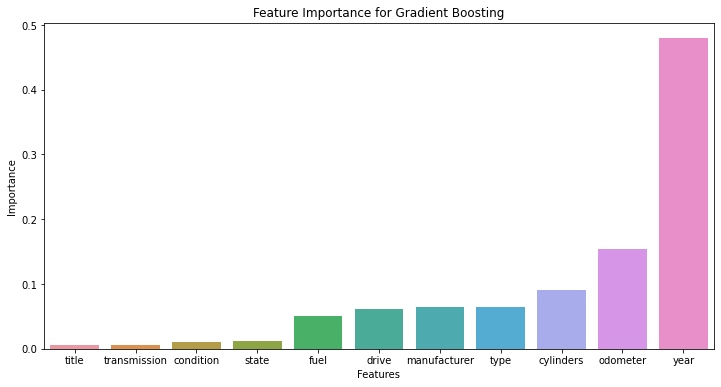

In [24]:
#feature importance plot for gradient boosting model
plt.figure(figsize=(12,6))
sns.barplot(x=feature_score.feature, y=feature_score.importance,order = feature_score.sort_values('importance').feature)
plt.title("Feature Importance for Gradient Boosting")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

### XGBoost

In [25]:
#XGBoost Model
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=5
)

In [26]:
#Training the XGBoost Model
regressor.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
#Predict test
y_pred = regressor.predict(x_test)
#Predict train
train_pred = regressor.predict(x_train)

In [28]:
#train RMSE - XGBoost
mse_train = mean_squared_error(y_train, train_pred)
rmse = math.sqrt(mse_train)
train_rmse.append(rmse)
print("rmse(Train):",rmse)
#test RMSE - XGBoost
mse = mean_squared_error(y_test,y_pred)
rmse=math.sqrt(mse)
test_rmse.append(rmse)
rmse
print("rmse(Test):",rmse)

rmse(Train): 0.27548923266175107
rmse(Test): 0.2833384330049441


In [29]:
#train R^2 - XGBoost
r_sqr1 = r2_score(y_train, train_pred)
print("r_squared(Train):",r_sqr1)
train_r2.append(r_sqr1)
#test R^2 - XGBoost
r_sqr = r2_score(y_test, y_pred)
test_r2.append(r_sqr)
print("r_squared(Test):",r_sqr)

r_squared(Train): 0.8577193644674471
r_squared(Test): 0.8485268217508458


In [30]:
pickle.dump(regressor, open('XG.pkl','wb'))

In [31]:
#feature importance for XGBoost Model
cat_columns=['manufacturer','condition','cylinders','fuel','title_status','transmission','type','state']
feature_imp = pd.DataFrame(list(zip(regressor.feature_importances_,x_train)),columns = ("importance","features"))

feature_split = pd.DataFrame(feature_imp["features"].str.split("_",n = 1, expand = True))
feature_cat = pd.concat([feature_imp["importance"], feature_split], axis=1, join='inner')
feature_cat.columns = ["importance","feature","split2"]
feature_score = feature_cat.groupby('feature', as_index=False)['importance'].sum()
feature_score

,feature,importance
0,condition,0.016470
1,cylinders,0.028663
2,drive,0.045809
3,fuel,0.121036
4,manufacturer,0.404269
5,odometer,0.027604
6,state,0.021960
7,title,0.021583
8,transmission,0.018939
9,type,0.178855


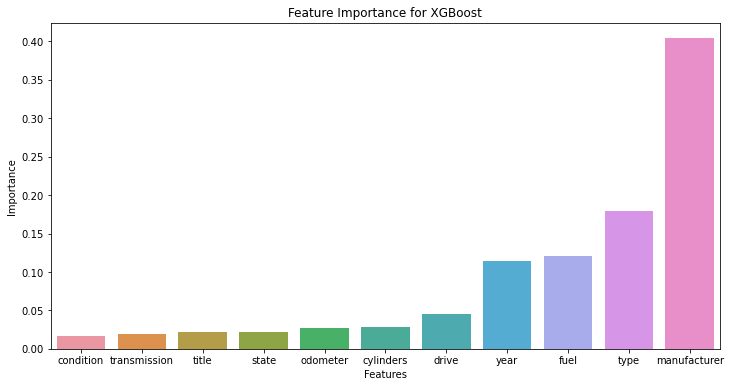

In [32]:
#feature importance plot for XGBoost model
plt.figure(figsize=(12,6))
sns.barplot(x=feature_score.feature, y=feature_score.importance,order = feature_score.sort_values('importance').feature)
plt.title("Feature Importance for XGBoost")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

### Random Forest

In [33]:
#Random Forest Model
random_forest = RandomForestRegressor(
    n_estimators=20, 
    random_state=0,
    n_jobs=-1)

In [34]:
#Training the Random Forest model
random_forest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=0)

In [35]:
#predict test
y_pred_test = random_forest.predict(x_test)
#predict train
y_pred_train = random_forest.predict(x_train)

In [36]:
#train RMSE - Random Forest
mse_train = mean_squared_error(y_train, y_pred_train)
rmse = math.sqrt(mse_train)
train_rmse.append(rmse)
print("rmse(Train):",rmse)
#test RMSE - Random Forest
mse = mean_squared_error(y_test,y_pred_test)
rmse=math.sqrt(mse)
test_rmse.append(rmse)
rmse
print("rmse(Test):",rmse)

rmse(Train): 0.0944379846368207
rmse(Test): 0.23735193205934563


In [37]:
#train R^2 - Random Forest
r_sqr1 = r2_score(y_train, y_pred_train)
print("r_squared(Train):",r_sqr1)
train_r2.append(r_sqr1)
#test R^2 - Random Forest
r_sqr = r2_score(y_test, y_pred_test)
test_r2.append(r_sqr)
print("r_squared(Test):",r_sqr)

r_squared(Train): 0.9832802431067738
r_squared(Test): 0.8937056195219538


In [38]:
#feature importance for Random Forest
cat_columns=['manufacturer','condition','cylinders','fuel','title_status','transmission','type','state']
feature_imp = pd.DataFrame(list(zip(random_forest.feature_importances_,x_train)),columns = ("importance","features"))

feature_split = pd.DataFrame(feature_imp["features"].str.split("_",n = 1, expand = True))
feature_cat = pd.concat([feature_imp["importance"], feature_split], axis=1, join='inner')
feature_cat.columns = ["importance","feature","split2"]
feature_score = feature_cat.groupby('feature', as_index=False)['importance'].sum()
feature_score

,feature,importance
0,condition,0.017003
1,cylinders,0.082800
2,drive,0.061298
3,fuel,0.049130
4,manufacturer,0.081941
5,odometer,0.169354
6,state,0.019170
7,title,0.006058
8,transmission,0.008127
9,type,0.053183


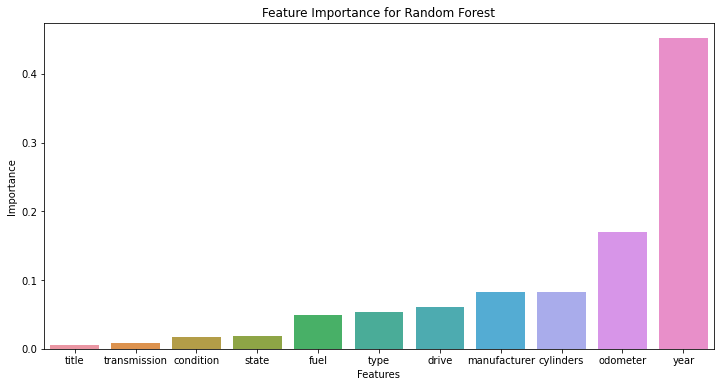

In [39]:
#feature importance plot for XGBoost model
plt.figure(figsize=(12,6))
sns.barplot(x=feature_score.feature, y=feature_score.importance,order = feature_score.sort_values('importance').feature)
plt.title("Feature Importance for Random Forest")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

### Average Regressor

In [40]:
#Modeling for Average Regressor
#Gradient Boosting
y_gbtest_pred = gb_model.predict(x_test)
y_gbtrain_pred = gb_model.predict(x_train)
#XGBoost
y_xgtest_pred = regressor.predict(x_test)
y_xgtrain_pred = regressor.predict(x_train)
#Random Forest
y_rftest_pred = random_forest.predict(x_test)
y_rftrain_pred = random_forest.predict(x_train)

In [41]:
#Average Regressor Model
avg_test_pred = (0.4*y_rftest_pred + 0.35*y_gbtest_pred + 0.25*y_xgtest_pred)
avg_train_pred = (0.4*y_rftrain_pred + 0.35*y_gbtrain_pred + 0.25*y_xgtrain_pred)

In [42]:
#train RMSE - Average Regressor
mse_train = mean_squared_error(y_train, avg_train_pred)
rmse = math.sqrt(mse_train)
train_rmse.append(rmse)
print("rmse(Train):",rmse)
#test RMSE - Average Regressor
mse = mean_squared_error(y_test,avg_test_pred)
rmse=math.sqrt(mse)
test_rmse.append(rmse)
rmse
print("rmse(Test):",rmse)

rmse(Train): 0.1529891074346607
rmse(Test): 0.23048801201530256


In [43]:
#train R^2 - Average Regressor
r_sqr1 = r2_score(y_train, avg_train_pred)
print("r_squared(Train):",r_sqr1)
train_r2.append(r_sqr1)
#test R^2 - Average Regressor
r_sqr = r2_score(y_test, avg_test_pred)
test_r2.append(r_sqr)
print("r_squared(Test):",r_sqr)

r_squared(Train): 0.9561209153353927
r_squared(Test): 0.8997645263968529


### Lasso Regression

In [44]:
#Lasso Regression model
lassoRegressor=Lasso(alpha= 0.007761033)

In [45]:
#Training the model
lassoRegressor.fit(x_train,y_train)

Lasso(alpha=0.007761033)

In [46]:
#predict train
lassoTrainPrediction=lassoRegressor.predict(x_train)
#predict test
lassoTestPrediction=lassoRegressor.predict(x_test)

In [47]:
#train RMSE - Lasso Regression
mse_train = mean_squared_error(y_train, lassoTrainPrediction)
rmse = math.sqrt(mse_train)
train_rmse.append(rmse)
print("rmse(Train):",rmse)
#test RMSE - Lasso Regression
mse = mean_squared_error(y_test,lassoTestPrediction)
rmse=math.sqrt(mse)
test_rmse.append(rmse)
rmse
print("rmse(Test):",rmse)

rmse(Train): 0.39881175668101554
rmse(Test): 0.40101499468558394


In [48]:
#train R^2 - Lasso Regression
r_sqr1 = r2_score(y_train, lassoTrainPrediction)
print("r_squared(Train):",r_sqr1)
train_r2.append(r_sqr1)
#test R^2 - Lasso Regression
r_sqr = r2_score(y_test, lassoTestPrediction)
test_r2.append(r_sqr)
print("r_squared(Test):",r_sqr)

r_squared(Train): 0.7018241659711835
r_squared(Test): 0.6965787546457696


### Ridge Regression

In [49]:
#Ridge Regression Model
ridgeRegressor=Ridge(alpha=0.415545)

In [50]:
#Training the model
ridgeRegressor.fit(x_train,y_train)

Ridge(alpha=0.415545)

In [51]:
#predict train
trainPrediction=ridgeRegressor.predict(x_train)
#predict test
testPrediction=ridgeRegressor.predict(x_test)

In [52]:
#train RMSE - Ridge Regression
mse_train = mean_squared_error(y_train, avg_train_pred)
rmse = math.sqrt(mse_train)
train_rmse.append(rmse)
print("rmse(Train):",rmse)
#test RMSE - Ridge Regression
mse = mean_squared_error(y_test,avg_test_pred)
rmse=math.sqrt(mse)
test_rmse.append(rmse)
rmse
print("rmse(Test):",rmse)

rmse(Train): 0.1529891074346607
rmse(Test): 0.23048801201530256


In [53]:
#train R^2 - Ridge Regression
r_sqr1 = r2_score(y_train, avg_train_pred)
train_r2.append(r_sqr1)
print("r_squared(Train):",r_sqr1)
#test R^2 - Ridge Regression
r_sqr = r2_score(y_test, avg_test_pred)
test_r2.append(r_sqr)
print("r_squared(Test):",r_sqr)

r_squared(Train): 0.9561209153353927
r_squared(Test): 0.8997645263968529


### Plotting the RMSE and R^2 values

In [54]:
models = ['Gradient Boosting', 'XGBoost', 'Random Forest', 'Average Regressor', 'Lasso Regression', 'Ridge REgression']

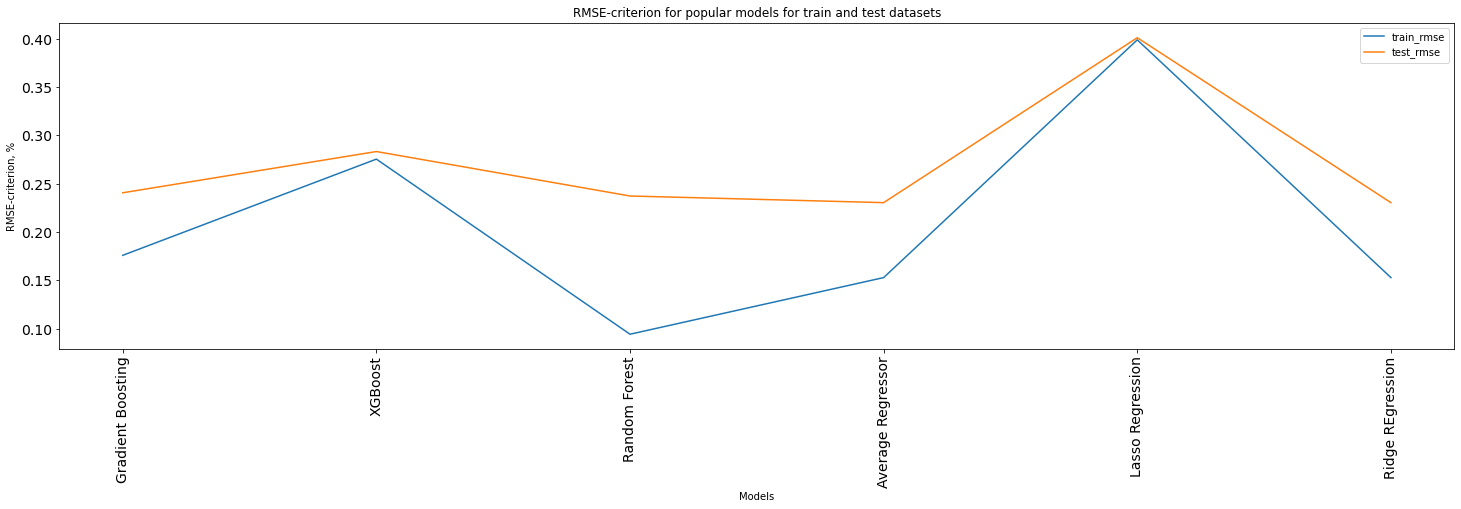

In [55]:
plt.figure(figsize=[25,6])
x = models
plt.tick_params(labelsize=14)
plt.plot(x, train_rmse, label = 'train_rmse')
plt.plot(x, test_rmse, label = 'test_rmse')
plt.legend()
plt.title('RMSE-criterion for popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE-criterion, %')
plt.xticks(x, rotation='vertical')
plt.show()

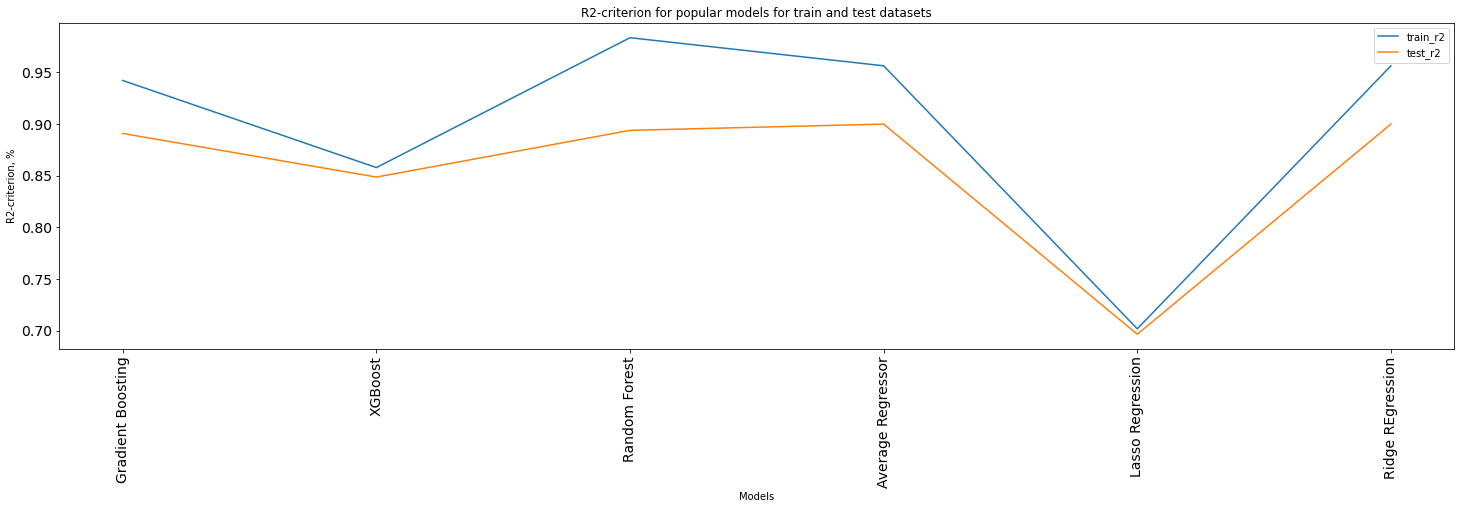

In [56]:
plt.figure(figsize=[25,6])
x = models
plt.tick_params(labelsize=14)
plt.plot(x, train_r2, label = 'train_r2')
plt.plot(x, test_r2, label = 'test_r2')
plt.legend()
plt.title('R2-criterion for popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(x, rotation='vertical')
plt.show()

### Deployment

In [57]:
#Serilization and De-serialization using Pickle
pickle.dump(random_forest, open('Model.pkl','wb'))

In [58]:
pd.Series(train_df.columns).to_pickle("./columns.pkl")